1. CustomerID
2. Age
3. Annual Income (k$)
4. Spending Score (1-100)
5. Genre_Female
6. Genre_Male
Enter the index of the X attribute: 2
Enter the index of the Y attribute: 3


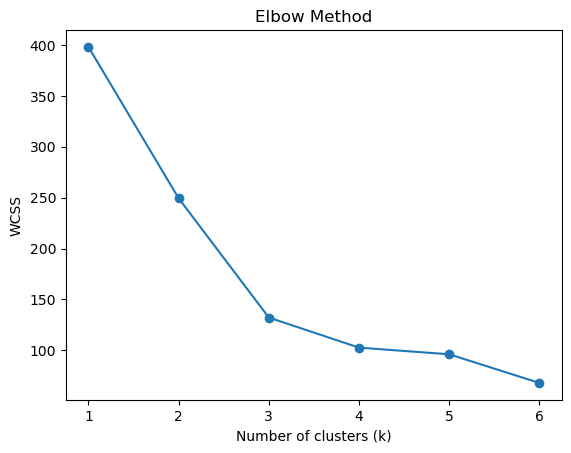

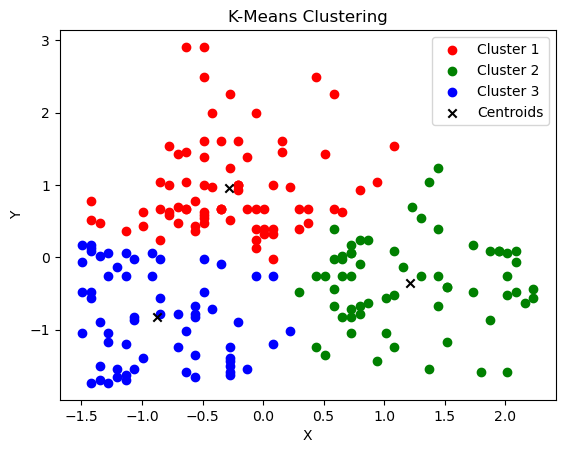

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def preprocess_dataset(data):
    # Convert categorical variables to numeric using one-hot encoding
    data = pd.get_dummies(data)
    
    # Normalize the dataset
    data = (data - data.mean()) / data.std()
    
    return data

def initialize_centroids(X, k):
    # Randomly initialize centroids by selecting k points from the dataset
    indices = np.random.choice(X.shape[0], size=k, replace=False)
    centroids = X[indices]
    return centroids

def assign_clusters(X, centroids):
    # Assign each point to the nearest centroid
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    clusters = np.argmin(distances, axis=0)
    return clusters

def update_centroids(X, clusters, k):
    # Update the centroids based on the mean of the points in each cluster
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        cluster_points = X[clusters == i]
        if len(cluster_points) > 0:
            centroids[i] = np.mean(cluster_points, axis=0)
    return centroids

def k_means(X, k, max_iterations=100):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iterations):
        old_centroids = centroids.copy()
        clusters = assign_clusters(X, centroids)
        centroids = update_centroids(X, clusters, k)
        if np.all(old_centroids == centroids):
            break
    return clusters, centroids

def calculate_wcss(X, clusters, centroids):
    # Calculate the within-cluster sum of squares (WCSS)
    wcss = 0
    for i in range(len(centroids)):
        cluster_points = X[clusters == i]
        wcss += np.sum((cluster_points - centroids[i])**2)
    return wcss

def elbow_method(X, max_k):
    wcss_values = []
    for k in range(1, max_k + 1):
        clusters, centroids = k_means(X, k)
        wcss = calculate_wcss(X, clusters, centroids)
        wcss_values.append(wcss)
    
    # Plot the WCSS values for different values of k
    plt.plot(range(1, max_k + 1), wcss_values, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('WCSS')
    plt.title('Elbow Method')
    plt.show()

def plot_clusters(X, clusters, centroids):
    # Plot the data points and cluster centroids
    colors = ['r', 'g', 'b', 'c', 'm', 'y']  # Customize colors if needed
    for i in range(len(centroids)):
        cluster_points = X[clusters == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='k', marker='x', label='Centroids')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('K-Means Clustering')
    plt.legend()
    plt.show()

# Example usage
data = pd.read_csv('dataset.csv')
data = preprocess_dataset(data)

# Get the list of attribute labels from the CSV file
attribute_labels = list(data.columns)

# Print the attribute labels and their indices
for i, label in enumerate(attribute_labels):
    print(f"{i+1}. {label}")

# Get user input for the X and Y attributes
x_index = int(input("Enter the index of the X attribute: ")) - 1
y_index = int(input("Enter the index of the Y attribute: ")) - 1

# Select the X and Y attributes from the dataset
X = data.iloc[:, x_index].values
Y = data.iloc[:, y_index].values

# Combine the X and Y attributes into a new dataset
selected_data = np.column_stack((X, Y))

# Determine the optimal value of k using the elbow method
elbow_method(selected_data, max_k=6)

# Apply K-Means clustering with the selected value of k
k = 3
clusters, centroids = k_means(selected_data, k)

# Plot the clusters
plot_clusters(selected_data, clusters, centroids)
